In [81]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [82]:
df = pd.read_csv("A:/End To End DS Project/notebooks/Data/stud.csv")

In [83]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [84]:
df.shape

(1000, 8)

### check missing values

In [85]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

- there is no Missing Values

### check Dublicated Rows

In [86]:
df.duplicated().sum()

np.int64(0)

- There is no dublicated rows

### Check Data types

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


- data types are correct and clear

### check number of unique values in each column

In [88]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [89]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Data Exploration

In [90]:
obj_cols = df.select_dtypes(include='O').columns
for col in obj_cols:
    print(f"Unique Values for {col}:")
    print(df[col].value_counts())
    print("----------------------------")


Unique Values for gender:
gender
female    518
male      482
Name: count, dtype: int64
----------------------------
Unique Values for race_ethnicity:
race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
----------------------------
Unique Values for parental_level_of_education:
parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
----------------------------
Unique Values for lunch:
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
----------------------------
Unique Values for test_preparation_course:
test_preparation_course
none         642
completed    358
Name: count, dtype: int64
----------------------------


### Adding Total and Average Score 

In [91]:
df['Total Score'] = df['math_score']+df['reading_score']+df['writing_score']
df['Avg Score'] = df['Total Score']/3

### Number of Students who got full mark in each subject

In [92]:
subjects = ['math_score','reading_score','writing_score']
for sub in subjects:
    print(f"Number of Students who got full mark in {sub[:-6]} : {df[df[sub]==100][sub].count()}")

Number of Students who got full mark in math : 7
Number of Students who got full mark in reading : 17
Number of Students who got full mark in writing : 14


### Number of Students who Got less than 20 in each subject

In [93]:
subjects = ['math_score','reading_score','writing_score']
for sub in subjects:
    print(f"Number of Students who got less than 20 in {sub[:-6]} : {df[df[sub]<=20][sub].count()}")

Number of Students who got less than 20 in math : 4
Number of Students who got less than 20 in reading : 1
Number of Students who got less than 20 in writing : 3


Insight:
- Reading has best performance
- math has worest perfomance


### Performance by Gender

- Do males and females perform differently in Math, Reading, or Writing?

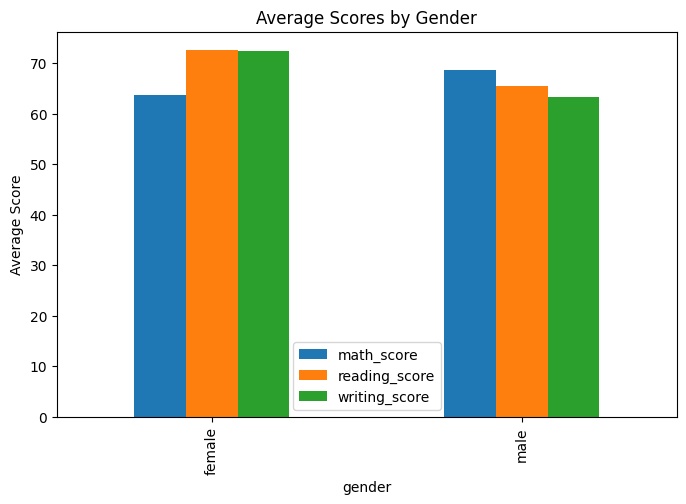

In [94]:
avg_scores = df.groupby('gender')[['math_score','reading_score','writing_score']].mean().reset_index()

avg_scores.plot(x='gender', kind='bar', figsize=(8,5))
plt.title("Average Scores by Gender")
plt.ylabel("Average Score")
plt.show()


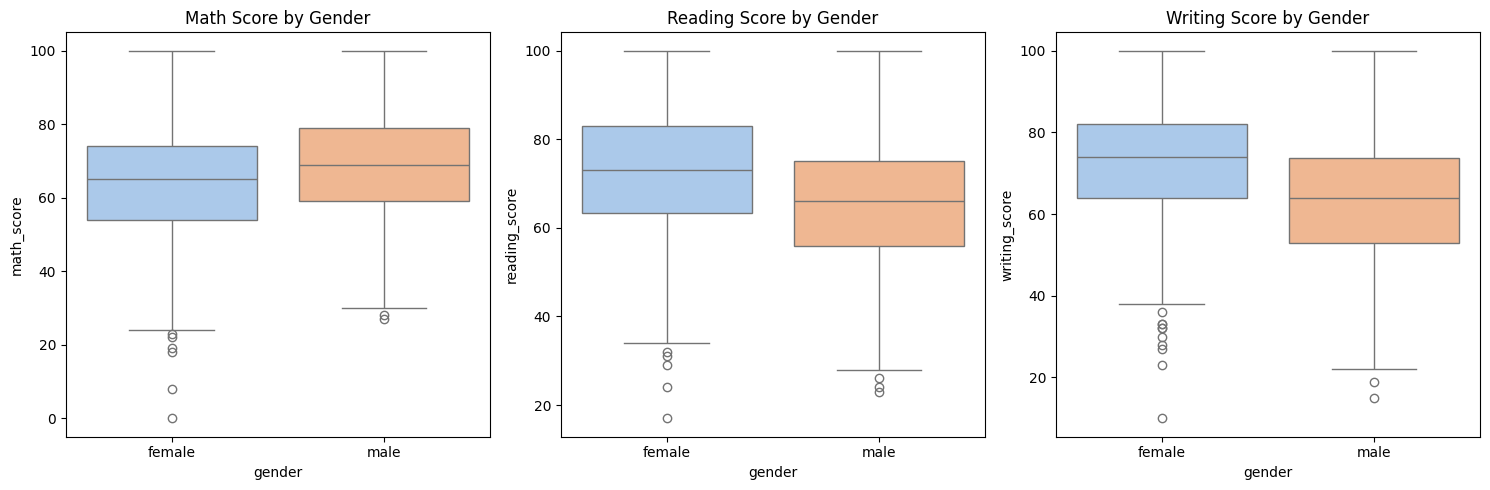

In [95]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
subjects = ['math_score', 'reading_score', 'writing_score']

for i, sub in enumerate(subjects):
    sns.boxplot(x='gender', y=sub, data=df, palette='pastel', ax=axes[i])
    axes[i].set_title(f"{sub.replace('_',' ').title()} by Gender")

plt.tight_layout()
plt.show()


insight:
- Females are better than males in reading and writing
- males are better than females in math

### Influence of Parental Education

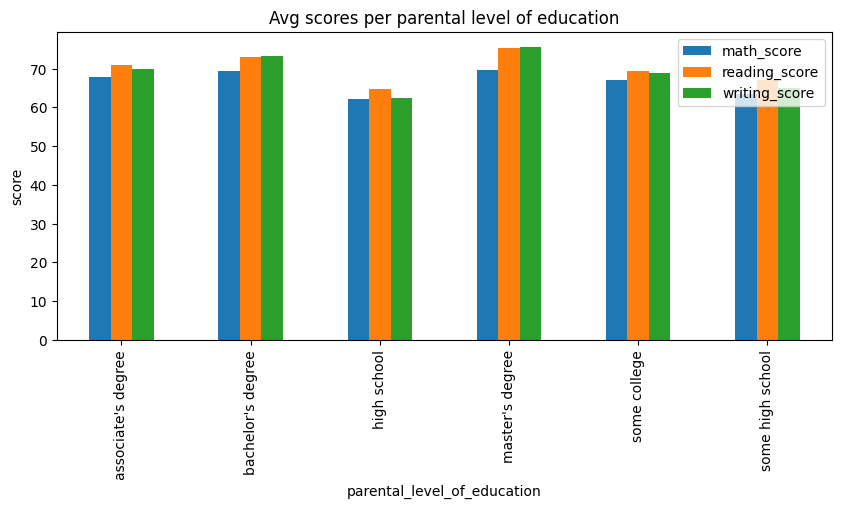

In [96]:
parents_edu = df.groupby('parental_level_of_education') [['math_score','reading_score','writing_score']].mean().reset_index()
parents_edu.plot(x='parental_level_of_education' ,kind='bar',figsize=(10,4))
plt.title("Avg scores per parental level of education")
plt.ylabel("score")
plt.show()

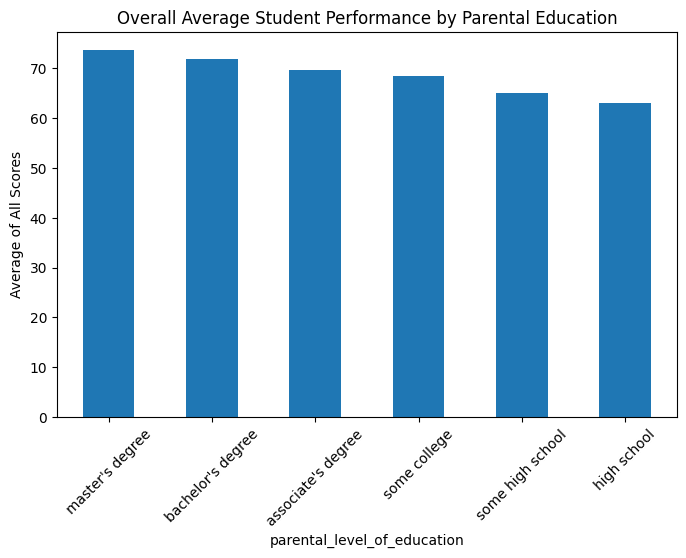

In [97]:
avg_by_edu = df.groupby('parental_level_of_education')['Avg Score'].mean().sort_values(ascending=False)
avg_by_edu.plot(kind='bar', figsize=(8,5))
plt.title("Overall Average Student Performance by Parental Education")
plt.ylabel("Average of All Scores")
plt.xticks(rotation=45)
plt.show()


Insights:

- Parental education level has a strong positive correlation with student performance.
- The higher the parent’s education, the higher the student’s average score.
- Students whose parents hold Bachelor’s or Master’s degrees perform significantly better in all subjects, particularly in Reading and Writing.
- Those with parents who only completed high school or less have lower performance on average

### Lunch Type (Socioeconomic Factor)

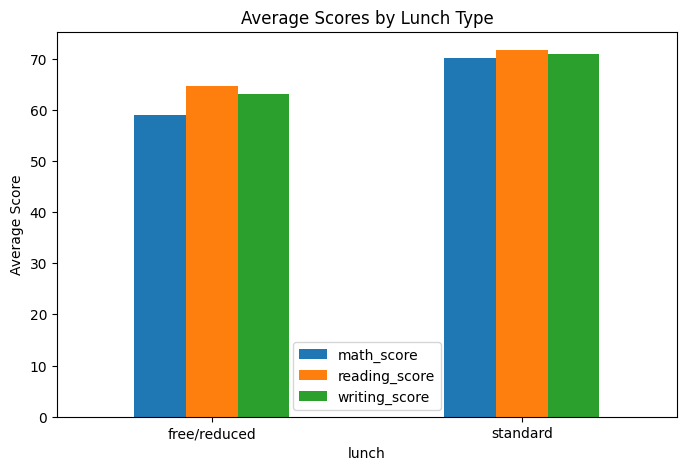

In [104]:
avg_lunch_scores = df.groupby('lunch')[['math_score', 'reading_score', 'writing_score']].mean()

avg_lunch_scores.plot(kind='bar', figsize=(8,5))
plt.title("Average Scores by Lunch Type")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.show()

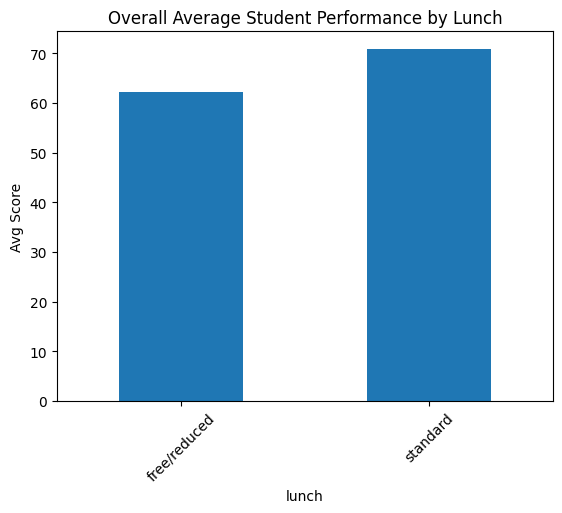

In [ ]:
lunch_sc = df.groupby('lunch')['Avg Score'].mean().sort_values(ascending=True)
lunch_sc.plot(kind='bar', x='lunch')
plt.title("Overall Average Student Performance by Lunch")
plt.ylabel("Avg Score")
plt.xticks(rotation=45)
plt.show()

Insights:

- Students with standard lunch perform better in all subjects compared to those with free/reduced lunch.
- The performance gap is around 12 points on average — a strong indicator of the socioeconomic impact on academic achievement.
- This suggests that economic background plays a measurable role in student outcomes.

### Test Preparation Course

In [110]:
df.groupby('test_preparation_course')[['math_score','reading_score','writing_score']].mean()


,math_score,reading_score,writing_score
test_preparation_course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


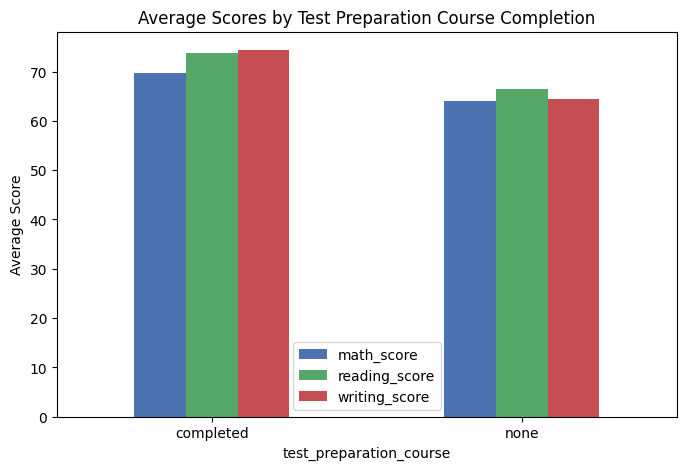

In [111]:
avg_prep_scores = df.groupby('test_preparation_course')[['math_score','reading_score','writing_score']].mean()

avg_prep_scores.plot(kind='bar', figsize=(8,5), color=['#4C72B0','#55A868','#C44E52'])
plt.title("Average Scores by Test Preparation Course Completion")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.show()


In [112]:
df.groupby('test_preparation_course')['Avg Score'].mean()

test_preparation_course
completed    72.669460
none         65.038941
Name: Avg Score, dtype: float64

Insights:

- Students who completed the test preparation course performed better in all subjects.
- The performance improvement is most visible in Reading and Writing.
- On average, completion of the course is associated with a 7–8 point higher total score.
- This suggests that test preparation programs are effective and could be recommended for improving student outcomes.

### Correlation & Overall Performance Analysis

In [113]:
corr = df[['math_score','reading_score','writing_score']].corr()
corr

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


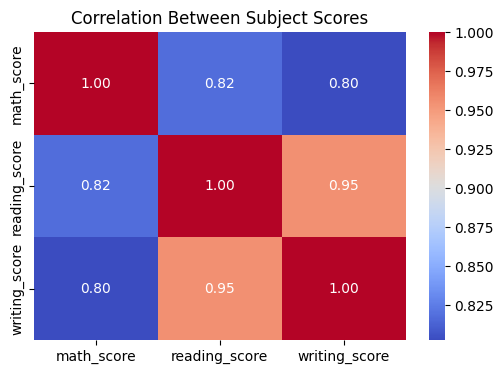

In [114]:
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Subject Scores")
plt.show()

insights:

- There is a strong positive correlation between all three subjects — success in one tends to mean success in others.
- Reading and Writing are almost perfectly related, suggesting they measure similar language skills.
- Math is also correlated, but a bit more independent — meaning a student could excel in math but not necessarily in reading/writing.

In [116]:
df.to_csv('A:/End To End DS Project/notebooks/Data/Processed_stud.csv', index=False)